### **Sentimental Analysis**

* ##### **Web Scraping**

###### Web scraping involves extracting data from websites. Used the requests library to fetch the HTML content of IMDb reviews and BeautifulSoup to parse and extract the review texts and ratings.

###### Scraping Reviews

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
def scrape_imdb_reviews(movie_url):
    reviews = []
    ratings = []

    for page in range(1, 50): 
        url = f'{movie_url}?page={page}'
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')

        reviews_on_page = [review.get_text(strip=True) for review in soup.find_all(class_='text show-more__control')]
        ratings_on_page = [rating.get_text(strip=True) for rating in soup.find_all('span', class_='rating-other-user-rating')]

        min_length = min(len(reviews_on_page), len(ratings_on_page))
        reviews.extend(reviews_on_page[:min_length])
        ratings.extend(ratings_on_page[:min_length])

    reviews_df = pd.DataFrame({
        'Review': reviews,
        'Rating': ratings
    })
    
    return reviews_df

#EXAMPLE: I have used twilight movie here:
movie_url_twilight = 'https://www.imdb.com/title/tt1099212/reviews'
twilight_reviews_df = scrape_imdb_reviews(movie_url_twilight)
print(twilight_reviews_df.head())


                                              Review Rating
0  That was my interpretation of this weekend tha...   5/10
1  NOTE: This review is the fair and unbiased opi...   4/10
2  This is just one person's opinion. No need to ...   5/10
3  This review may contain spoilers. You've been ...   1/10
4  I think this movie suffered from lack of a goo...   2/10


* ##### **Preprocessing Reviews**

###### Text preprocessing is crucial for cleaning and transforming raw text into a suitable format for analysis. This involves tasks like removing HTML tags, converting text to lowercase, and removing stop words.

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

* ###### Clean

###### Implemented a clean_text function to remove HTML tags, punctuation, and convert text to lowercase.

In [22]:
def clean_text(text):
    cleaned_text = re.sub(r'<.*?>', '', text)
    cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
    cleaned_text = cleaned_text.lower()
    return cleaned_text

twilight_reviews_df['Cleaned Review'] = twilight_reviews_df['Review'].apply(clean_text)

stop_words = set(stopwords.words('english'))

* ###### Tokenize

###### Tokenized the reviews and removed common stop words using NLTK's stop word list.

In [2]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

twilight_reviews_df['Tokens Without Stopwords'] = twilight_reviews_df['Cleaned Review'].apply(tokenize_and_remove_stopwords)

print(twilight_reviews_df.head())


                                              Review Rating  \
0  That was my interpretation of this weekend tha...   5/10   
1  NOTE: This review is the fair and unbiased opi...   4/10   
2  This is just one person's opinion. No need to ...   5/10   
3  This review may contain spoilers. You've been ...   1/10   
4  I think this movie suffered from lack of a goo...   2/10   

                                      Cleaned Review  \
0  that was my interpretation of this weekend tha...   
1  note this review is the fair and unbiased opin...   
2  this is just one persons opinion no need to ge...   
3  this review may contain spoilers youve been wa...   
4  i think this movie suffered from lack of a goo...   

                            Tokens Without Stopwords  
0  [interpretation, weekend, endure, working, mov...  
1  [note, review, fair, unbiased, opinion, someon...  
2  [one, persons, opinion, need, get, angry, fact...  
3  [review, may, contain, spoilers, youve, warned...  
4  [think

* ##### **Sentiment Analysis**

###### Sentiment analysis helps determine the emotional tone of text. Using TextBlob, we can calculate the sentiment polarity of reviews and categorize them into positive, negative, or neutral.

###### Used TextBlob to analyze the sentiment of each review

In [23]:
from textblob import TextBlob

###### The get_sentiment function calculates the polarity score of the reviews, and the get_sentiment_label function categorizes them as positive, negative, or neutral based on the score.

In [24]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

twilight_reviews_df['Sentiment'] = twilight_reviews_df['Cleaned Review'].apply(get_sentiment)

def get_sentiment_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

twilight_reviews_df['Sentiment Label'] = twilight_reviews_df['Sentiment'].apply(get_sentiment_label)

print(twilight_reviews_df[['Review', 'Sentiment Label']].head())


                                              Review Sentiment Label
0  That was my interpretation of this weekend tha...        Positive
1  NOTE: This review is the fair and unbiased opi...         Neutral
2  This is just one person's opinion. No need to ...        Positive
3  This review may contain spoilers. You've been ...         Neutral
4  I think this movie suffered from lack of a goo...         Neutral


* ##### **Visualization**

###### Visualization helps to interpret and communicate data insights effectively. Created various plots to visualize the sentiment analysis results and other aspects of the data.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

* ##### Sentiment Polarity Distribution

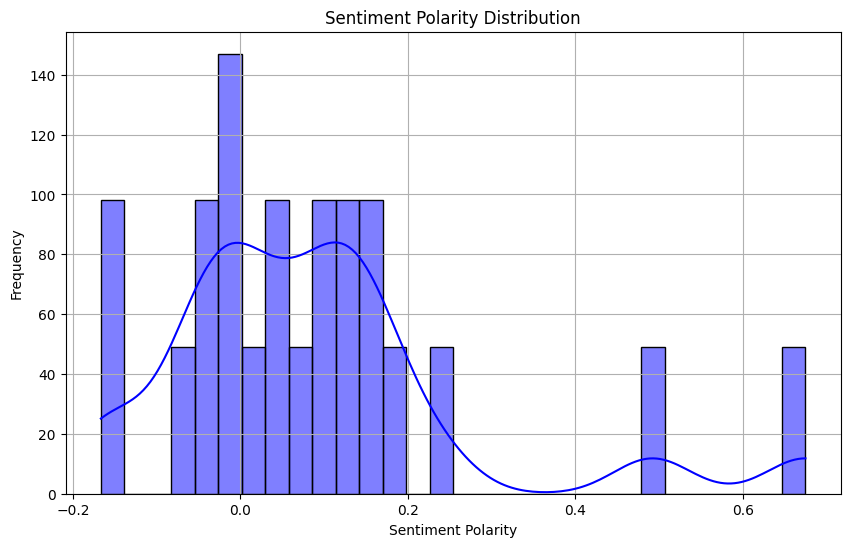

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(twilight_reviews_df['Sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* ##### Sentiment Label Distribution

C:\Users\SAMRUDDHI\AppData\Local\Temp\ipykernel_9564\113507525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Label', data=twilight_reviews_df, palette='viridis')


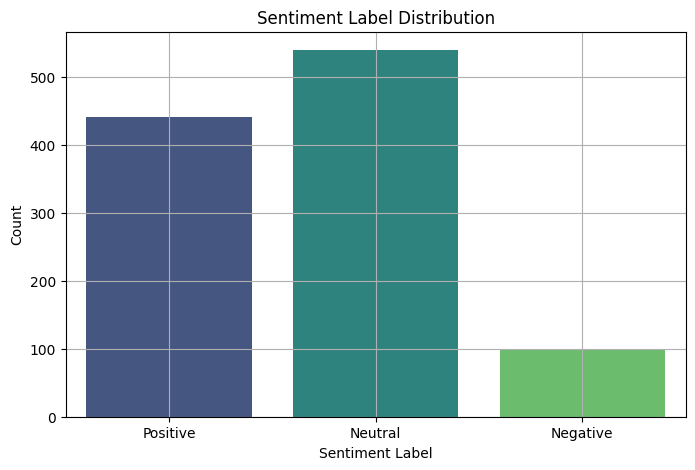

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment Label', data=twilight_reviews_df, palette='viridis')
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.grid(True)
plt.show()

* ##### Subjectivity Distribution

In [28]:
def get_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

twilight_reviews_df['Subjectivity'] = twilight_reviews_df['Cleaned Review'].apply(get_subjectivity)

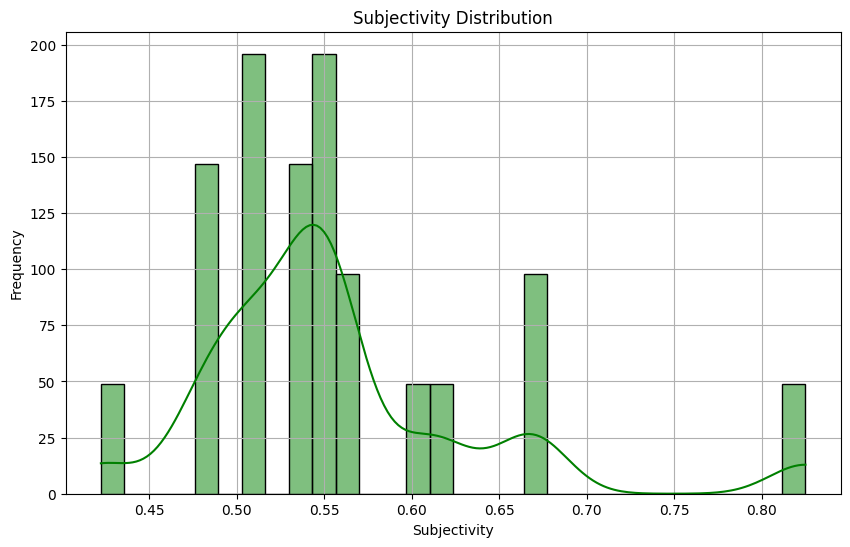

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(twilight_reviews_df['Subjectivity'], bins=30, kde=True, color='green')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* ##### Subjectivity Distribution

In [30]:
def get_subjectivity_label(score):
    if score > 0.5:
        return 'Opinionated'
    else:
        return 'Factual'

twilight_reviews_df['Subjectivity Label'] = twilight_reviews_df['Subjectivity'].apply(get_subjectivity_label)

C:\Users\SAMRUDDHI\AppData\Local\Temp\ipykernel_9564\795760539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subjectivity Label', data=twilight_reviews_df, palette='muted')


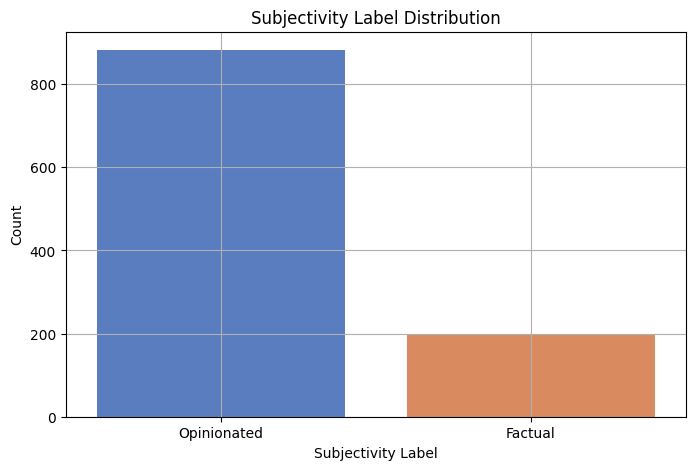

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Subjectivity Label', data=twilight_reviews_df, palette='muted')
plt.title('Subjectivity Label Distribution')
plt.xlabel('Subjectivity Label')
plt.ylabel('Count')
plt.grid(True)
plt.show()


* ##### Rating Distribution

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\SAMRUDDHI\AppData\Local\Temp\ipykernel_9564\3538357578.py:2: SyntaxWarning: invalid escape sequence '\d'
  twilight_reviews_df['Numeric Rating'] = twilight_reviews_df['Rating'].str.extract('(\d+)').astype(float)
C:\Users\SAMRUDDHI\AppData\Local\Temp\ipykernel_9564\3538357578.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Numeric Rating', data=twilight_reviews_df, palette='Set2')


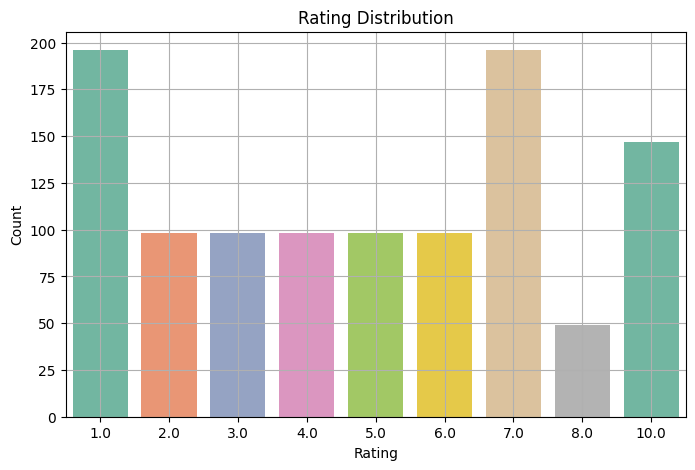

In [32]:
twilight_reviews_df['Numeric Rating'] = twilight_reviews_df['Rating'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8, 5))
sns.countplot(x='Numeric Rating', data=twilight_reviews_df, palette='Set2')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()

* ##### Word Cloud of the Movie

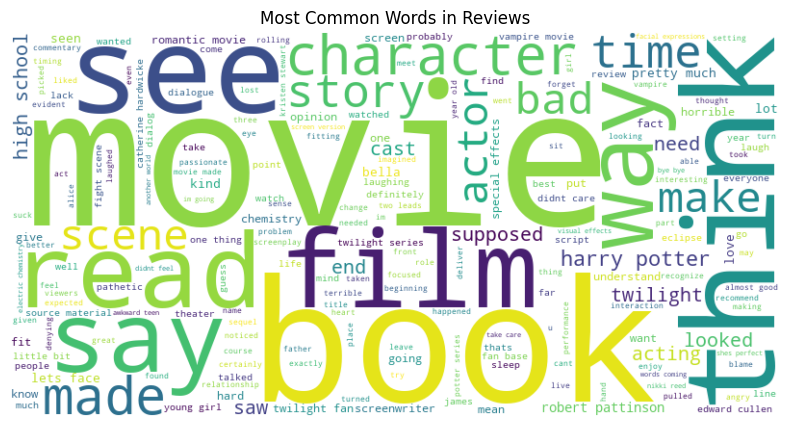

In [48]:
from wordcloud import WordCloud

all_reviews = ' '.join(twilight_reviews_df['Cleaned Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()
